<a href="https://colab.research.google.com/github/CypherGuedes/Perceptron/blob/Atividade-15/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron classification accuracy: 100.00%


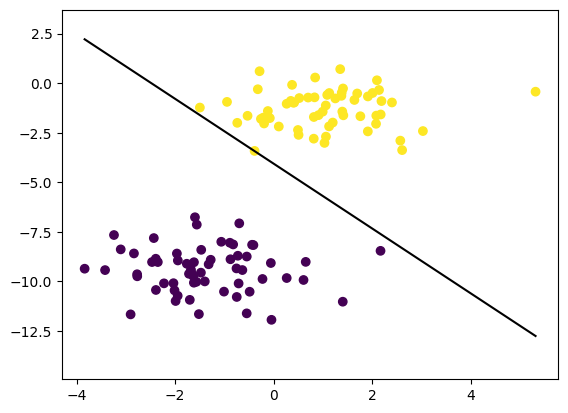

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, alpha=0.1, epochs=10):
        np.random.seed(1)  # [OBS1] Inicializando a semente para reprodução dos testes
        self.alpha = alpha  # Atividade 1: alpha é a nossa taxa de aprendizado
        self.epochs = epochs
        self.weights = None
        self.bias = None

    # Atividade 1: Inicialize os Pesos e Bias com valores aleatórios entre -1 e 1
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1, 1, n_features)
        self.bias = np.random.uniform(-1, 1)

        for epoch in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):

                # Atividade 2: Defina as funções de treinamento
                output = self.predict(x_i)
                erro = y_esperado - output
                self.weights += self.alpha * erro * x_i
                self.bias += self.alpha * erro

    # Atividade 3: Calcule o output do perceptron
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

    # Função degrau de ativação
    def activation(self, signal):
        return np.where(signal >= 0, 1, 0)

    # Atividade 4: Função para calcular a acurácia
    def accuracy(self, y_true, y_pred):
        # Inicializa o contador de acertos
        hits = 0
        for true, pred in zip(y_true, y_pred):
            if true == pred:
                hits += 1

        # Calcula a porcentagem de acertos
        accuracy = (hits / len(y_true)) * 100
        return accuracy

from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

p = Perceptron(alpha=0.01, epochs=10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

# Calcula a acurácia e imprime o resultado
acc = p.accuracy(y_test, predictions)
print("Perceptron classification accuracy: {:.2f}%".format(acc))

# Visualizando o problema que foi solucionado (em gráfico)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  52.0M      0 --:--:-- --:--:-- --:--:-- 52.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28881  100 28881    0     0   665k      0 --:--:-- --:--:-- --:--:--  671k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1610k  100 1610k    0     0  15.0M      0 --:--:-- --:--:-- --:--:-- 15.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4542  100  4542    0     0  45198      0 --:--:-- --:--:-- --:--:-- 51033
gzip: sample_data is a directory -- ignored
28
28
78

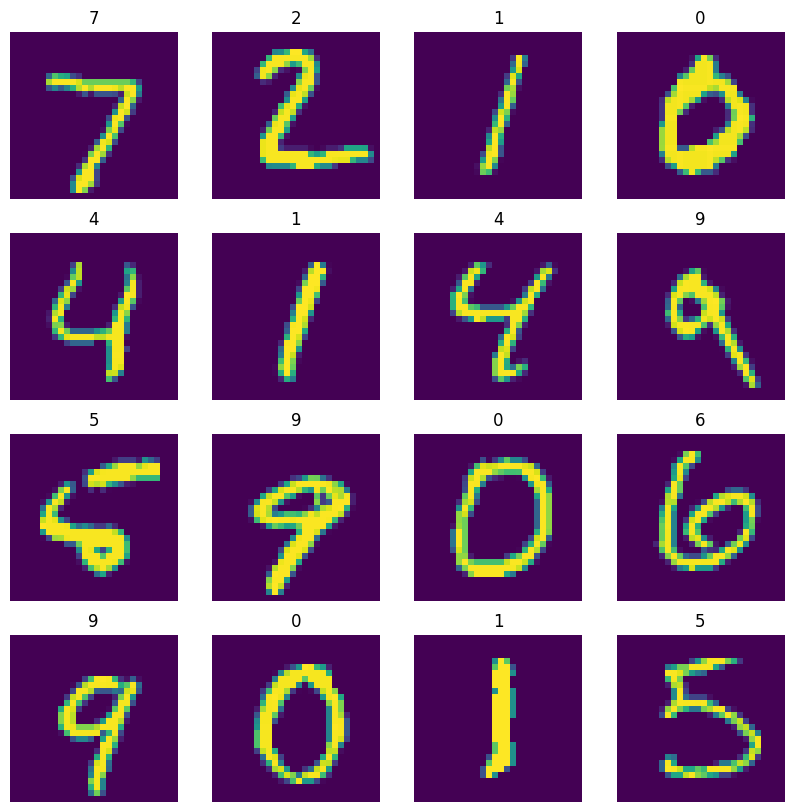

In [2]:
# Preparação de dados à Atividade 5
# download do dataset (training set images)
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# download do dataset (training set labels)
!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# download do dataset (testing set images)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# download do dataset (testing set labels)
!curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

# Extrair arquivos com a opção -f para forçar a substituição
!gunzip -f *

def bytes_to_int(byte_data):
    return int.from_bytes(byte_data, 'big')

def read_images(filename, n_max_images=None, show=False):
    images = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_images = bytes_to_int(f.read(4))
        if n_max_images:
            n_images = n_max_images
        n_rows = bytes_to_int(f.read(4))
        n_columns = bytes_to_int(f.read(4))
        for image_idx in range(n_images):
            image = []
            for row_idx in range(n_rows):
                row = []
                for col_idx in range(n_columns):
                    if show:
                        pixel = f.read(1)
                    else:
                        pixel = bytes_to_int(f.read(1))
                    row.append(pixel)
                image.append(row)
            images.append(image)
    return images

def read_labels(filename, n_max_labels=None):
    labels = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_labels = bytes_to_int(f.read(4))
        if n_max_labels:
            n_labels = n_max_labels
        for label_idx in range(n_labels):
            label = bytes_to_int(f.read(1))
            labels.append(label)
    return labels

def flatten_list(l):
    return [pixel for sublist in l for pixel in sublist]

def extract_features(X):
    return [flatten_list(sample) for sample in X]

#Pré-processamento
TEST_DATA_FILENAME = 't10k-images-idx3-ubyte'
TEST_LABELS_FILENAME = 't10k-labels-idx1-ubyte'
TRAIN_DATA_FILENAME = 'train-images-idx3-ubyte'
TRAIN_LABELS_FILENAME = 'train-labels-idx1-ubyte'

n_train = 100 # Numero de imagens carregadas para treinamento
n_test = 10 # Numero de imagens carregadas para teste

x_train = read_images(TRAIN_DATA_FILENAME, n_train)
y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)
print(len(x_train[0]))
print(len(x_train[0][0]))

x_test = read_images(TEST_DATA_FILENAME, n_test)
y_test = read_labels(TEST_LABELS_FILENAME, n_test)

x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
print(len(x_train[0]))

#Visualização
from PIL import Image

sample_images = read_images(TEST_DATA_FILENAME, 16, show=True)
sample_labels = read_labels(TEST_LABELS_FILENAME, 16)
plt.figure(figsize=(10, 10))
for idx, test_sample in enumerate(sample_images):
    img = Image.fromarray(np.array(test_sample), 'L')
    ax = plt.subplot(4, 4, idx + 1)
    plt.imshow(img)
    plt.title(int(sample_labels[idx]))
    plt.axis("off")

In [3]:
# Atividade 5: Formatar rótulos de treinamento para o perceptron classificador de 1s
y_formatado_1s = [1 if label == 1 else 0 for label in y_train]

# Atividade 6: Treinar o perceptron classificador de 1s
P = Perceptron(alpha=0.1, epochs=50)
P.fit(x_train, y_formatado_1s)

# Atividade 7: Gerar vetor de predições usando o conjunto de teste
predictions = P.predict(x_test)

# Comparar rótulos reais (y_test) com as predições
correct_predictions = [1 if label == 1 else 0 for label in y_test]

print(y_test)  # Deve conter 10 números, incluindo alguns 1s
print(predictions)  # Deve conter valores próximos a 0 ou 1, dependendo do desempenho do perceptron
print(correct_predictions)  # Deve conter 10 números, com 1 nas posições correspondentes ao dígito 1


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[0 0 1 0 0 1 0 0 0 0]
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]


In [4]:
# Atividade 8: Inicialize a lista de perceptrons
perceptrons = []

for i in range(10):
    perceptron = Perceptron(alpha=0.1, epochs=50)
    perceptrons.append(perceptron)

# Impressão da lista de perceptrons
print(perceptrons)

[<__main__.Perceptron object at 0x7e5270d8fbe0>, <__main__.Perceptron object at 0x7e5270d8f0a0>, <__main__.Perceptron object at 0x7e52a29a63b0>, <__main__.Perceptron object at 0x7e52a29a6260>, <__main__.Perceptron object at 0x7e52a29a7550>, <__main__.Perceptron object at 0x7e52a29a6230>, <__main__.Perceptron object at 0x7e52a29a7e80>, <__main__.Perceptron object at 0x7e52a29ec100>, <__main__.Perceptron object at 0x7e52a29ec160>, <__main__.Perceptron object at 0x7e52a29ec130>]


In [5]:
# Atividade 9: Loop de treinamento
for i, perceptron in enumerate(perceptrons):
    print(f"Treinando Perceptron {i + 1}")
    # Formate o y_train para este perceptron
    y_formatado = [1 if label == i else 0 for label in y_train]
    perceptron.fit(x_train, y_formatado)
    print(f"Perceptron {i + 1} treinado com sucesso!")

# Impressão da conclusão do treinamento
print("Treinamento concluído para todos os perceptrons")

Treinando Perceptron 1
Perceptron 1 treinado com sucesso!
Treinando Perceptron 2
Perceptron 2 treinado com sucesso!
Treinando Perceptron 3
Perceptron 3 treinado com sucesso!
Treinando Perceptron 4
Perceptron 4 treinado com sucesso!
Treinando Perceptron 5
Perceptron 5 treinado com sucesso!
Treinando Perceptron 6
Perceptron 6 treinado com sucesso!
Treinando Perceptron 7
Perceptron 7 treinado com sucesso!
Treinando Perceptron 8
Perceptron 8 treinado com sucesso!
Treinando Perceptron 9
Perceptron 9 treinado com sucesso!
Treinando Perceptron 10
Perceptron 10 treinado com sucesso!
Treinamento concluído para todos os perceptrons


In [6]:
# Atividade 10: Loop de predições
predictions = []

for perceptron in perceptrons:
    # Calcule as previsões para o conjunto de teste
    prediction = perceptron.predict(x_test)
    # Adicione a previsão à lista de previsões
    predictions.append(prediction)

    # Imprima as previsões deste perceptron
    print(f"Previsão do Perceptron {perceptrons.index(perceptron) + 1}: {prediction}")

# Agora 'predictions' contém as previsões de todos os perceptrons para o conjunto de teste

Previsão do Perceptron 1: [0 0 0 1 0 0 0 0 0 0]
Previsão do Perceptron 2: [0 1 1 0 0 1 0 0 0 0]
Previsão do Perceptron 3: [0 1 0 0 0 0 0 0 0 0]
Previsão do Perceptron 4: [0 0 0 0 0 0 0 0 0 0]
Previsão do Perceptron 5: [0 0 0 0 1 0 1 1 0 0]
Previsão do Perceptron 6: [0 0 0 0 0 0 0 0 0 0]
Previsão do Perceptron 7: [0 0 0 0 0 0 0 0 0 0]
Previsão do Perceptron 8: [1 0 0 0 0 0 0 0 0 0]
Previsão do Perceptron 9: [0 0 0 0 0 0 0 0 0 0]
Previsão do Perceptron 10: [0 0 0 0 0 0 0 0 0 1]


In [7]:
# Atividade 11: Melhorar a Acuracia
# Reformatando o vetor de predições
grouped_predictions = []
for i in range(n_test):
    singlePrediction = []
    for j, prediction in enumerate(predictions):
        singlePrediction.append(prediction[i])
    grouped_predictions.append(singlePrediction)

# Reformatando o vetor de labels
def convert_number_to_array_prediction(n):
    array_prediction = np.zeros(10)
    array_prediction[n] = 1
    return array_prediction

def convert_y_test_to_array_prediction(ytest):
    convertedList = []
    for i in ytest:
        convertedList.append(convert_number_to_array_prediction(i))
    return np.array(convertedList)

# Salvando novo vetor de y_test
y_test_as_array = convert_y_test_to_array_prediction(y_test)

# Definindo nova função de acurácia
def calculate_accuracy(predictions, y_test):
    hits = 0
    for i, prediction in enumerate(predictions):
        if (prediction == y_test[i]).all():
            hits += 1
    accuracy = hits / len(y_test)
    return accuracy

# Calcular a acurácia
accuracy = calculate_accuracy(grouped_predictions, y_test_as_array)
print("Acuracia: {:.2f}%".format(accuracy * 100))

Acuracia: 70.00%


In [52]:
class Perceptron(object):
    def __init__(self, epochs=1000, alpha=0.01):
        np.random.seed(1)
        self.epochs = epochs
        self.alpha = alpha
        self.weights = None
        self.bias = None

        # Atividade 12: Inicialize os Pesos e Bias
        self.weights = np.random.uniform(-0.5, 0.5, n_features)
        self.bias = np.random.uniform(-0.5, 0.5)
        print("Pesos iniciais:", self.weights)
        print("Bias inicial:", self.bias)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Atividade 13: Calcule o Sigmoid_Derivative
        return x * (1 - x)

    def fit(self, X, Y):
        n_samples, n_features = X.shape

        for epoch in range(self.epochs):
            for x_i, y_esperado in zip(X, Y):
                output = self.predict(x_i)
                sigmoid_derivative = self.sigmoid_derivative(output)

                erro = y_esperado - output
                self.weights += self.alpha * sigmoid_derivative * erro * x_i
                self.bias += self.alpha * sigmoid_derivative * erro

    def predict(self, X):
        # Atividade 14: Calcule o output do perceptron
        linear_output = np.dot(X, self.weights) + self.bias
        sigmoid_output = self.sigmoid(linear_output)
        return sigmoid_output

# Atividade 15: Liste, Treine e Rode o sistema
P_list = []  # Lista para armazenar os 10 perceptrons
final_predictions = []  # Lista para armazenar as previsões finais

for i in range(10):
    # Inicializando cada perceptron
    p = Perceptron(epochs=2000, alpha=0.01)
    print(f"Inicializando Perceptron {i}")

    # Treinando cada perceptron
    p.fit(x_train, y_formatado)
    print(f"Perceptron {i} treinado")

    P_list.append(p)

# Gerando seu vetor de predições
for x_test_sample in x_test:
    predictions = [p.predict(x_test_sample) for p in P_list]
    final_predictions.append(predictions)

# Calculando a acurácia
accuracy = calculate_accuracy(final_predictions, y_test)
print("Acuracia: {:.2f}%".format(accuracy * 100))

Pesos iniciais: [-8.29779953e-02  2.20324493e-01 -4.99885625e-01 -1.97667427e-01
 -3.53244109e-01 -4.07661405e-01 -3.13739789e-01 -1.54439273e-01
 -1.03232526e-01  3.88167340e-02 -8.08054856e-02  1.85219500e-01
 -2.95547750e-01  3.78117436e-01 -4.72612407e-01  1.70467510e-01
 -8.26951976e-02  5.86898284e-02 -3.59613061e-01 -3.01898511e-01
  3.00744569e-01  4.68261576e-01 -1.86575822e-01  1.92322616e-01
  3.76389152e-01  3.94606664e-01 -4.14955789e-01 -4.60945217e-01
 -3.30169580e-01  3.78142503e-01 -4.01653166e-01 -7.88923750e-02
  4.57889530e-01  3.31652850e-02  1.91877114e-01 -1.84484369e-01
  1.86500928e-01  3.34625672e-01 -4.81711723e-01  2.50144315e-01
  4.88861089e-01  2.48165654e-01 -2.19556008e-01  2.89279328e-01
 -3.96773993e-01 -5.21064738e-02  4.08595503e-01 -2.06385852e-01
 -2.12224661e-01 -3.69971428e-01 -4.80633042e-01  1.78835533e-01
 -2.88371884e-01 -2.34453341e-01 -8.42684072e-03 -4.46637455e-01
  7.41176055e-02 -3.53271425e-01  8.93055369e-02  1.99758360e-01
 -3.97665